In [1]:
import pandas as pd
import os

# Verinin Y√ºklenmesi

In [2]:
current_dir = os.getcwd()
data_path = os.path.join(current_dir, "Sleep_health_and_lifestyle_dataset.csv")
data = pd.read_csv(data_path)
data.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [3]:
data.tail()


Person ID  Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
369        370  Female   59      Nurse             8.1                 9   
370        371  Female   59      Nurse             8.0                 9   
371        372  Female   59      Nurse             8.1                 9   
372        373  Female   59      Nurse             8.1                 9   
373        374  Female   59      Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category Blood Pressure  \
369                       75             3   Overweight         140/95   
370                       75             3   Overweight         140/95   
371                       75             3   Overweight         140/95   
372                       75             3   Overweight         140/95   
373                       75             3   Overweight         140/95   

     Heart Rate  Daily Steps Sleep Disorder  
369          68         7000    Sleep Apnea  
370          68         7000    Sleep Apnea  
371          68         7000    Sleep Apnea  
372          68         7000    Sleep Apnea  
373          68         7000    Sleep Apnea

# Verinin Ke≈üfi

Veri seti hakkƒ±nda genel √∂zelliklere baktƒ±ƒüƒ±mƒ±zda s√ºtunlarƒ±n tiplerinin doƒüru bir ≈üekilde tanƒ±mlandƒ±ƒüƒ±nƒ± ve eksik veri bulunmadƒ±ƒüƒ±nƒ± g√∂r√ºyoruz.

In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


(374, 13)

In [5]:
# Eksik verilerin olup olmadƒ±ƒüƒ±ndan emin olalƒ±m
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Sadece 3 deƒüer g√∂r√ºyoruz. Hi√ß uyku problemi olmama durumu yok. Yani buradaki eksik veriler uyku problemi olmama durumunu (none) belirtiyor fakat eksik veri olarak girilmi≈ü olabilir. Buradaki eksik verileri none olarak dolduralƒ±m.

In [6]:
data["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [7]:
# Sleep Disorder s√ºtunundaki eksik deƒüerleri 'None' ile doldur
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')


In [8]:
# Eksik verilerin olup olmadƒ±ƒüƒ±ndan emin olalƒ±m
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [9]:
# Tekrar eden veri kontrol√º
data.duplicated().sum()

0

ƒ∞statistiksel daƒüƒ±lƒ±mlara baktƒ±ƒüƒ±mƒ±zda genel olarak veri setinin kapsamlƒ± ve d√ºzg√ºn bir daƒüƒ±lƒ±ma sahip olduƒüunu g√∂rebiliyoruz.

Neredeyse her bir s√ºtun i√ßin ortalama deƒüer ile %50 noktasƒ± birbirine √ßok yakƒ±n. Age ve daily steps gibi bazƒ± s√ºtunlarda min ve max deƒüerleri, standart sapmayƒ± g√∂z √∂n√ºnde bulundurduƒüumuzda aykƒ±rƒ± veri bulunuyor olabilir. Daha ileride bunun analizini yapacaƒüƒ±z.

In [10]:
# ƒ∞statistiksel √∂zet
data.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

# Verinin G√∂rselle≈ütirilmesi

In [11]:
# K√ºt√ºphaneleri i√ße aktaralƒ±m
import matplotlib.pyplot as plt
import seaborn as sns

ƒ∞stisnalar ve daƒüƒ±lƒ±mlar olmak √ºzere, ya≈ü arttƒ±k√ßa uyku s√ºresinin arttƒ±ƒüƒ±nƒ± ve bir doƒürusallƒ±k bulunduƒüunu bu grafikten anlayabiliyoruz.

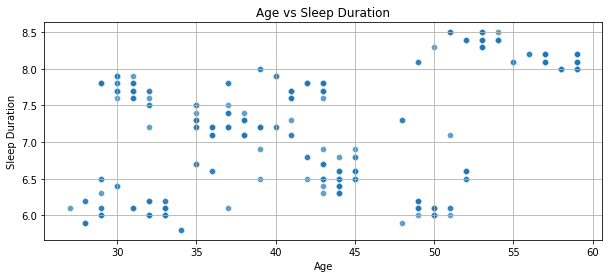

In [12]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=data, x='Age', y='Sleep Duration', alpha=0.7)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.grid(True)
plt.show()

Fiziksel aktivite seviyesi arttƒ±k√ßa uyku s√ºresi az miktarda artƒ±yor gibi g√∂z√ºk√ºyor.

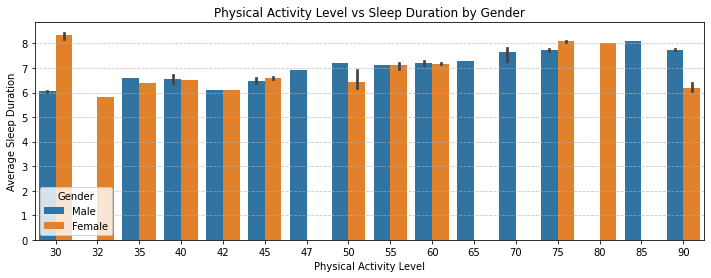

In [13]:
plt.figure(figsize=(12, 4))
sns.barplot(data=data, x='Physical Activity Level', y='Sleep Duration', hue='Gender')
plt.title('Physical Activity Level vs Sleep Duration by Gender')
plt.xlabel('Physical Activity Level')
plt.ylabel('Average Sleep Duration')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Kadƒ±nlar ya≈ülandƒ±k√ßa daha √ßok uyku sorunu √ßekiyor gibi g√∂z√ºk√ºyor. Erkekler ise daha gen√ß ya≈ülarda bu sorunlara sahip.

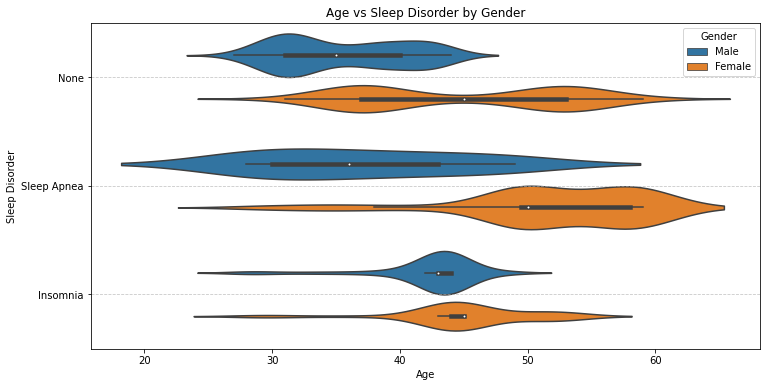

In [14]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Age', hue='Gender', y=data['Sleep Disorder'])
plt.title('Age vs Sleep Disorder by Gender')
plt.xlabel('Age')
plt.ylabel('Sleep Disorder')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bu grafiƒüe g√∂re en √ßok uyku problemi √ßeken meslekler; hem≈üirelik, √∂ƒüretmenler ve pazarlamacƒ±lar gibi g√∂z√ºk√ºyor. √ñzellik se√ßimine daha ge√ßmedik fakat meslek s√ºtunu, uyku problemi sƒ±nƒ±flandƒ±rmasƒ± modeli i√ßin √∂nemli bir √∂zellik olacaktƒ±r.

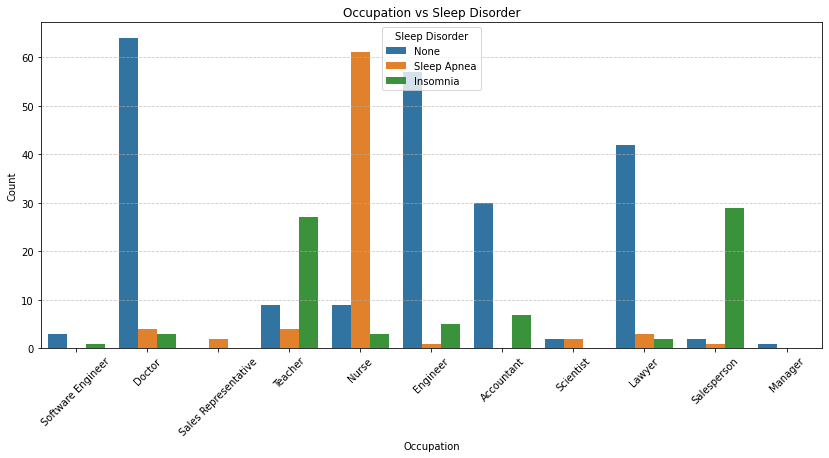

In [15]:
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='Occupation', hue='Sleep Disorder')
plt.title('Occupation vs Sleep Disorder')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bu grafikten √ßƒ±karƒ±mƒ±mƒ±z m√ºhendis ve doktor gibi mesleklerin kaliteli uyku √ßektikleri kanƒ±sƒ±nda. En k√∂t√º uykuya sahip meslekler; satƒ±≈ü temsilcisi ve bilim insanƒ± gibi g√∂z√ºk√ºyor.

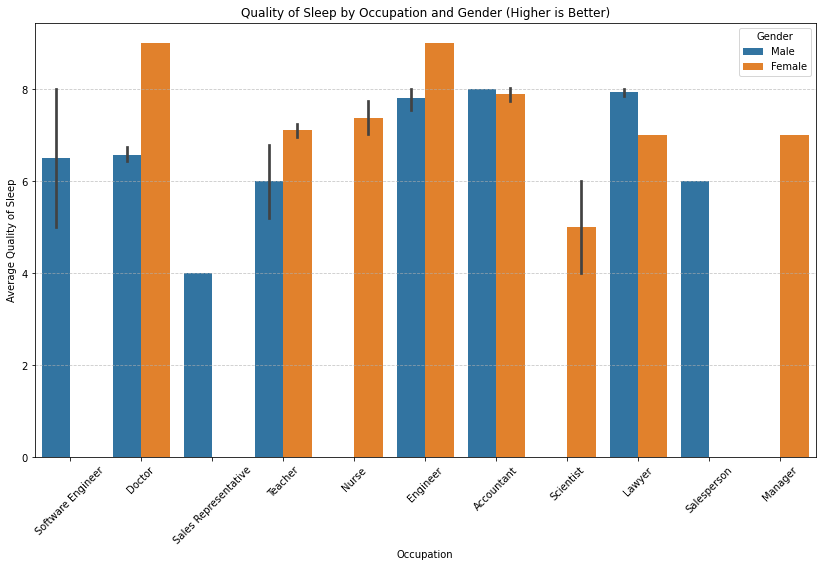

In [16]:
plt.figure(figsize=(14, 8))
sns.barplot(data=data, x='Occupation', y='Quality of Sleep', hue='Gender')
plt.title('Quality of Sleep by Occupation and Gender (Higher is Better)')
plt.xlabel('Occupation')
plt.ylabel('Average Quality of Sleep')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Veri setinde 2 kere tekrar eden bir BMI kategorisi varmƒ±≈ü. En iyisi normal weight ile normal olan kategorileri birle≈ütirip tek bir normal kategorisi elde edelim.

Ayrƒ±ca obez olup da uyku problemi √ßekmeyen biri yok gibi g√∂z√ºk√ºyor. Kilo, uyku sorunlarƒ±nƒ± tetikleyen bir etken gibi g√∂z√ºk√ºyor.

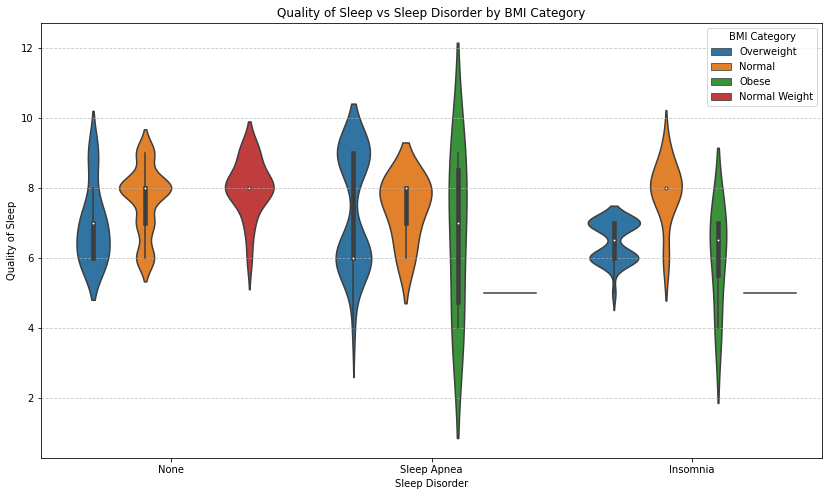

In [17]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=data, x='Sleep Disorder', y='Quality of Sleep', hue='BMI Category')
plt.title('Quality of Sleep vs Sleep Disorder by BMI Category')
plt.xlabel('Sleep Disorder')
plt.ylabel('Quality of Sleep')
plt.legend(title='BMI Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
data['BMI Category'] = data['BMI Category'].replace('Normal Weight', 'Normal')


Stres seviyesi arttƒ±k√ßa uyku kalitesinin d√º≈üt√ºƒü√ºn√º g√∂zlemleyebiliyoruz.

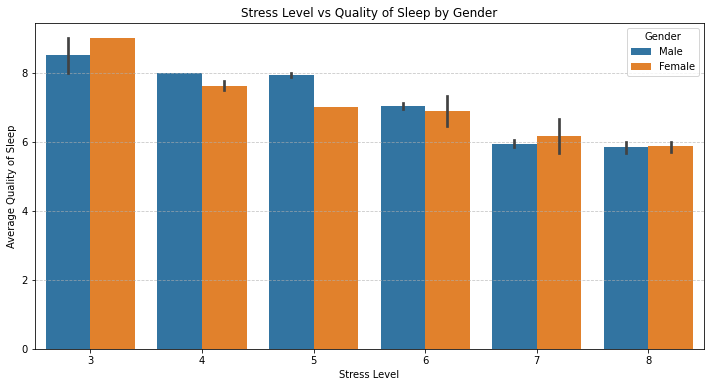

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Stress Level', y='Quality of Sleep', hue='Gender')
plt.title('Stress Level vs Quality of Sleep by Gender')
plt.xlabel('Stress Level')
plt.ylabel('Average Quality of Sleep')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Stres seviyesi arttƒ±k√ßa uyku problemleri ortaya √ßƒ±kƒ±yor.

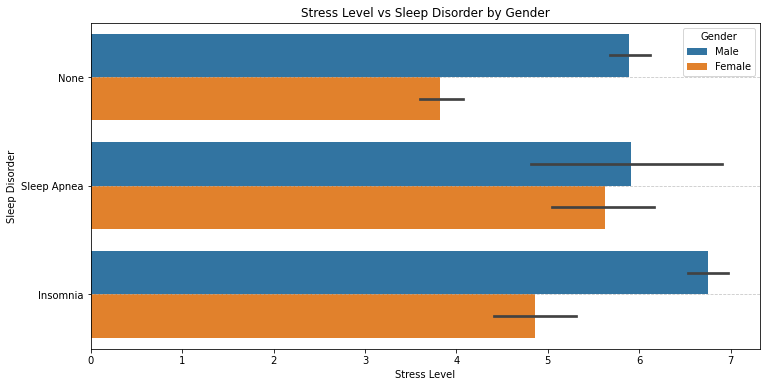

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Stress Level', y='Sleep Disorder', hue='Gender')
plt.title('Stress Level vs Sleep Disorder by Gender')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Disorder')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Veri √ñni≈üleme

Veri setindeki s√ºtunlarda sadece heart_rate s√ºtununda minimal bir aykƒ±rƒ± deƒüer miktarƒ± var. Bu aykƒ±rƒ± deƒüerler ≈üimdilik durabilir, √∂zellik se√ßimi esnasƒ±nda eƒüer heart rate √∂nem te≈ükil ediyorsa bu aykƒ±rƒ± deƒüerleri √ßƒ±kartabiliriz.

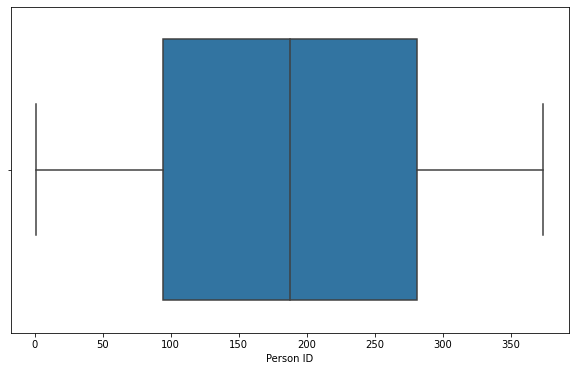

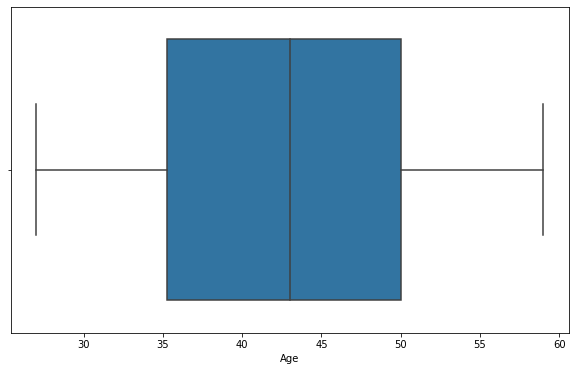

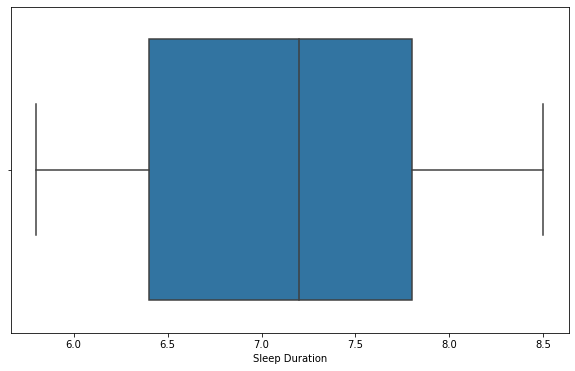

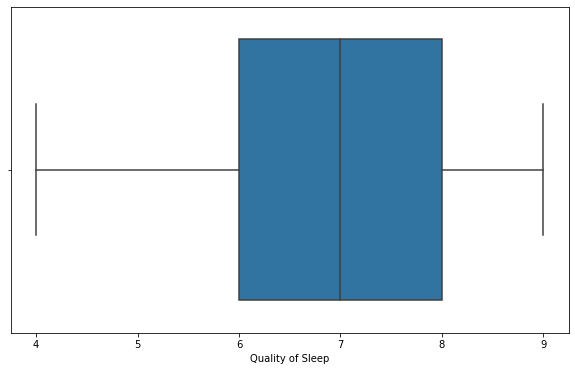

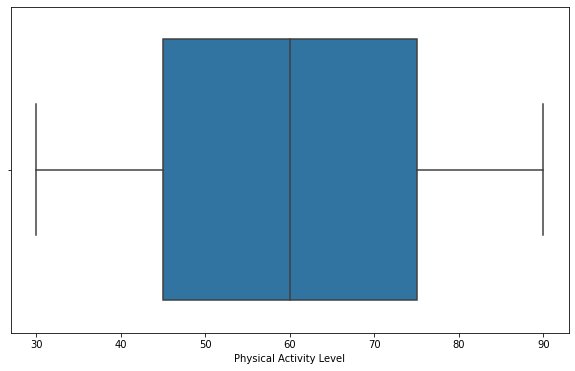

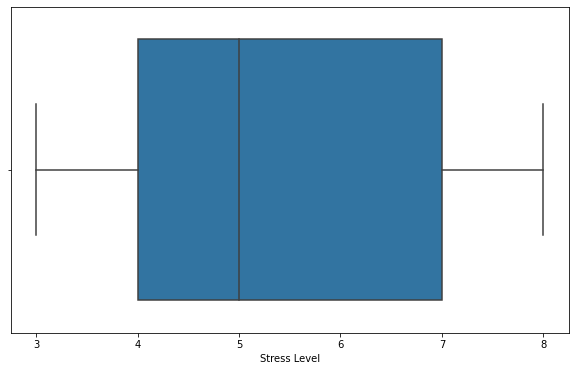

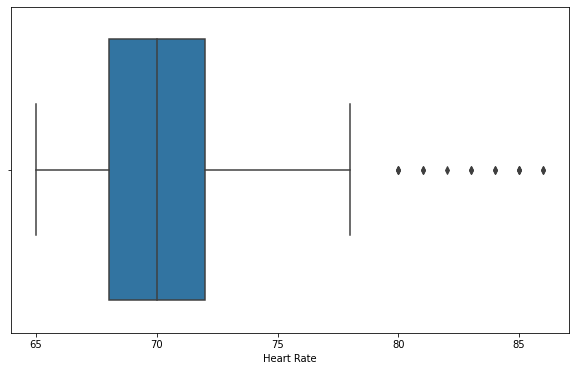

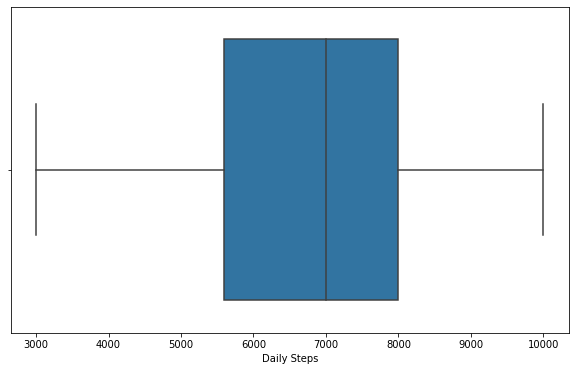

In [21]:
sayisal = data.select_dtypes(include=['int64', 'float64'])
for sutun in sayisal:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=sayisal, x=sayisal[sutun])
    plt.show()


# √ñzellik Se√ßimi

Neden √ñzellik Se√ßimi Yapƒ±yoruz?

Modelin daha hƒ±zlƒ± ve verimli √ßalƒ±≈ümasƒ±nƒ± saƒülamak

Gereksiz, etkisiz veya fazla korelasyonlu deƒüi≈ükenleri elemek

A≈üƒ±rƒ± √∂ƒürenme (overfitting) riskini azaltmak

Daha az ama daha anlamlƒ± veriyle y√ºksek doƒüruluk elde etmek

In [22]:
from sklearn.preprocessing import LabelEncoder

# BMI Category - sƒ±ralƒ± manuel encoding
data['BMI Category'] = data['BMI Category'].map({
    'Normal': 0,
    'Overweight': 1,
    'Obese': 2
})

# Sleep Disorder (hedef) - sƒ±ralƒ± manuel encoding
data['Sleep Disorder'] = data['Sleep Disorder'].map({
    'None': 0,
    'Insomnia': 1,
    'Sleep Apnea': 2
})

# Gender - 0/1'e √ßevir 
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Occupation - frequency encoding

occupation_freq = data['Occupation'].value_counts(normalize=True)
data['Occupation'] = data['Occupation'].map(occupation_freq)

# Blood Pressure - sayƒ±sal par√ßalama
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data.drop(columns='Blood Pressure', inplace=True)

# X ve y ayrƒ±mƒ±
X = data.drop(columns=['Sleep Disorder', 'Person ID'])
y = data['Sleep Disorder']


In [23]:
from sklearn.preprocessing import StandardScaler

# 1. Sayƒ±sal s√ºtunlarƒ± se√ß
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                  'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

# 2. Sayƒ±sal olmayan (kategorik veya encode edilmi≈ü) s√ºtunlarƒ± belirle
categorical_cols = [col for col in X.columns if col not in numerical_cols]

# 3. Sayƒ±sal olanlara scaler uygula
scaler = StandardScaler()
X_scaled_numerical = pd.DataFrame(
    scaler.fit_transform(X[numerical_cols]),
    columns=numerical_cols,
    index=X.index
)

# 4. Kategorik olanlarƒ± olduƒüu gibi al
X_categorical = X[categorical_cols]

# 5. ƒ∞kisini birle≈ütir
X_scaled = pd.concat([X_scaled_numerical, X_categorical], axis=1)


## SelectKBest

Her √∂zelliƒüin hedef deƒüi≈ükenle olan ili≈ükisini istatistiksel olarak test eder.

En y√ºksek F-score deƒüerine sahip K adet √∂zelliƒüi se√ßer.

√ñzellikle hedef deƒüi≈üken s√ºrekli veya sƒ±ralƒ±ysa etkilidir.

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

def select_k_best_with_scores(X_scaled, y, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X_scaled, y)

    scores = selector.scores_
    selected = selector.get_support()

    feature_scores = pd.DataFrame({
        'Feature': X_scaled.columns,
        'Score': scores,
        'Selected': selected
    }).sort_values(by='Score', ascending=False)

    return feature_scores


| Sƒ±ra | √ñzellik                     | Skor   | A√ßƒ±klama                                                                                 |
| ---- | --------------------------- | ------ | ---------------------------------------------------------------------------------------- |
| 1    | **BMI Category**            | 299.81 | Uyku bozukluƒüu ile en g√º√ßl√º ili≈ükili. Fazla kilolu/obez bireylerde daha sƒ±k g√∂r√ºlebilir. |
| 2    | **Diastolic**               | 268.10 | Alt tansiyon. Uyku kalitesi ve bozukluklarƒ±yla doƒürudan ili≈ükili.                        |
| 3    | **Systolic**                | 214.58 | √úst tansiyon. Y√ºksek tansiyon uyku apnesiyle baƒülantƒ±lƒ± olabilir.                        |
| 4    | **Age**                     | 58.41  | Ya≈ü arttƒ±k√ßa uyku problemleri artabilir. G√º√ßl√º ili≈üki var.                               |
| 5    | **Occupation**              | 53.77  | ƒ∞≈ü t√ºr√º (gece/masa ba≈üƒ±/fiziksel i≈ü) uyku d√ºzenini etkileyebilir.                        |
| 6    | **Physical Activity Level** | 44.15  | Fiziksel aktivite d√º≈ü√ºkse uyku kalitesi genellikle d√º≈üer.                                |
| 7    | **Heart Rate**              | 32.95  | Dinlenme nabzƒ±, stres ve uyku kalitesiyle ilgili olabilir.                               |
| 8    | **Sleep Duration**          | 31.91  | Uyku s√ºresi doƒürudan bozukluklarla baƒülantƒ±lƒ±.                                           |
| 9    | **Gender**                  | 31.51  | Cinsiyet bazlƒ± farklƒ±lƒ±klar var (√∂rneƒüin kadƒ±nlarda insomnia daha yaygƒ±n).               |
| 10   | **Quality of Sleep**        | 27.60  | Uyku bozukluƒüu tanƒ±sƒ± genellikle d√º≈ü√ºk uyku kalitesiyle birlikte gelir.                  |
| 11   | **Daily Steps**             | 24.78  | Etkili ama ilk 10‚Äôa girememi≈ü. G√ºnl√ºk hareketlilik bir fakt√∂r olabilir.                  |
| 12   | **Stress Level**            | 6.60   | En d√º≈ü√ºk ili≈üki. Belki de verideki √∂l√ß√ºm tipi/formatƒ± doƒüru ili≈ükiyi yansƒ±tamƒ±yor.       |


In [25]:
kbest_result = select_k_best_with_scores(X_scaled, y, k=5)
print(kbest_result)


                    Feature       Score  Selected
11             BMI Category  299.810555      True
8                 Diastolic  268.097906      True
7                  Systolic  214.585414      True
0                       Age   58.408963      True
10               Occupation   53.774459      True
3   Physical Activity Level   44.150579     False
5                Heart Rate   32.948639     False
1            Sleep Duration   31.913468     False
9                    Gender   31.510655     False
2          Quality of Sleep   27.600604     False
6               Daily Steps   24.776923     False
4              Stress Level    6.603565     False


Kbest √∂zellik se√ßimi sonrasƒ±nda X_kbest adlƒ± yeni bir √∂zellik seti olu≈üturduk.


In [26]:
# SelectKBest ile se√ßilen s√ºtunlarƒ± al
selected_features_kbest = kbest_result[kbest_result['Selected'] == True]['Feature'].tolist()

# Bu √∂zellik setini ayrƒ± bir X tanƒ±mƒ±yla sakla
X_kbest = X_scaled[selected_features_kbest]


## RFE Y√∂ntemi

Belirli bir tahmin modeli (√∂rneƒüin, Logistic Regression) √ºzerinden √ßalƒ±≈üƒ±r.

√ñnemsiz bulduƒüu √∂zellikleri yinelemeli olarak kaldƒ±rƒ±r.

En iyi performansƒ± veren alt √∂zellik k√ºmesini arar.

A≈üamalƒ± olarak √∂zellik √ßƒ±karƒ±mƒ± yaptƒ±ƒüƒ± i√ßin g√º√ßl√ºd√ºr.

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


def rfe_feature_selection_with_table(X, y, n=5):
    # 1. Model tanƒ±mla
    model = LogisticRegression(max_iter=1000)

    # 2. RFE ile se√ßici olu≈ütur
    selector = RFE(estimator=model, n_features_to_select=n)
    selector.fit(X, y)

    # 3. T√ºm √∂zellikler i√ßin sƒ±ralama ve se√ßim bilgisi i√ßeren tablo
    ranking_df = pd.DataFrame({
        'Feature': X.columns,
        'Ranking': selector.ranking_,
        'Selected': selector.support_
    }).sort_values(by='Ranking')

    # 4. Se√ßilen √∂zellik isimleri
    selected_features = ranking_df[ranking_df['Selected']]['Feature'].tolist()

    # 5. Yeni √∂zellik seti olu≈ütur
    X_rfe = X[selected_features]

    return ranking_df, X_rfe


x_rfe setini elde ettik

In [28]:
rfe_table, X_rfe = rfe_feature_selection_with_table(X_scaled, y, n=10)

# Tabloyu yazdƒ±r
print(rfe_table)

                    Feature  Ranking  Selected
0                       Age        1      True
1            Sleep Duration        1      True
2          Quality of Sleep        1      True
3   Physical Activity Level        1      True
5                Heart Rate        1      True
6               Daily Steps        1      True
7                  Systolic        1      True
8                 Diastolic        1      True
9                    Gender        1      True
11             BMI Category        1      True
10               Occupation        2     False
4              Stress Level        3     False


##  Mutual Information

√ñzelliklerin hedef deƒüi≈ükenle olan bilgi kazancƒ± ili≈ükisini √∂l√ßer.

√ñzellikler ve hedef deƒüi≈üken arasƒ±ndaki baƒüƒ±mlƒ±lƒ±ƒüƒ± yakalar.

Doƒürusal olmayan ili≈ükileri bile tespit edebilir.

In [29]:
from sklearn.feature_selection import mutual_info_classif

def mi_feature_selection_with_table(X, y, top_n=5):
    # MI skorlarƒ±nƒ± hesapla
    mi_scores = mutual_info_classif(X, y, random_state=42)
    
    # DataFrame'e √ßevir ve sƒ±rala
    mi_df = pd.DataFrame({
        'Feature': X.columns,
        'MI Score': mi_scores
    }).sort_values(by='MI Score', ascending=False)
    
    # ƒ∞lk N √∂zelliƒüi se√ß
    selected_features = mi_df.head(top_n)['Feature'].tolist()
    X_mi = X[selected_features]

    return mi_df, X_mi



| Sƒ±ra | √ñzellik                      | MI Score | A√ßƒ±klama                                                                                                  |
| ---- | ---------------------------- | -------- | --------------------------------------------------------------------------------------------------------- |
| 1    | **Systolic (√ºst tansiyon)**  | 0.4989   | Uyku bozukluklarƒ±nƒ± g√º√ßl√º ≈üekilde a√ßƒ±klƒ±yor. Hipertansiyon ile uyku apnesi arasƒ±nda sƒ±kƒ± ili≈üki olabilir. |
| 2    | **Diastolic (alt tansiyon)** | 0.4916   | √úst tansiyonla birlikte kalp-damar y√ºk√º ve uyku problemleri baƒülantƒ±lƒ± olabilir.                          |
| 3    | **Daily Steps**              | 0.4912   | Fiziksel hareketlilik arttƒ±k√ßa uyku bozukluƒüu riski d√º≈üebilir. ƒ∞lgin√ß ve √∂nemli bir bulgu.                |
| 4    | **Sleep Duration**           | 0.4700   | Uyku s√ºresi doƒürudan uyku bozukluƒüu t√ºr√º ile ili≈ükili olabilir.                                           |
| 5    | **Occupation**               | 0.4618   | Gece vardiyasƒ± veya stresli i≈ülerin uyku d√ºzenini bozduƒüu bilinir.                                        |
| 6    | **Age**                      | 0.4548   | Ya≈ülandƒ±k√ßa uyku kalitesi ve s√ºresi d√º≈üebilir, bozukluk riski artar.                                      |
| 7    | **BMI Category**             | 0.3965   | Obezite uyku apnesi riskini artƒ±rƒ±r. Bu skor da bunu doƒüruluyor.                                          |
| 8    | **Physical Activity Level**  | 0.3675   | Daha az aktif olan bireylerde bozukluk daha yaygƒ±n olabilir.                                              |
| 9    | **Heart Rate**               | 0.3283   | Dinlenme nabzƒ±, stres seviyesi ve uyku kalitesine baƒülƒ±dƒ±r.                                               |
| 10   | **Stress Level**             | 0.2991   | Yine makul katkƒ± yapan bir √∂zellik; daha az ama var.                                                      |
| 11   | **Quality of Sleep**         | 0.2038   | MI y√∂ntemine g√∂re daha az katkƒ± saƒülƒ±yor ‚Äî biraz ≈üa≈üƒ±rtƒ±cƒ± olabilir.                                      |
| 12   | **Gender**                   | 0.0281   | Kadƒ±n/erkek farkƒ± bu modelde anlamlƒ± bir ayrƒ±m yaratmamƒ±≈ü.                                                |


X_mi √∂zellik setini olu≈üturduk

In [30]:
mi_table, X_mi = mi_feature_selection_with_table(X_scaled, y, top_n=10)

# Sonu√ßlarƒ± yazdƒ±r
print(mi_table)


                    Feature  MI Score
7                  Systolic  0.498863
8                 Diastolic  0.491640
6               Daily Steps  0.491215
1            Sleep Duration  0.470002
10               Occupation  0.461800
0                       Age  0.454784
11             BMI Category  0.396546
3   Physical Activity Level  0.367500
5                Heart Rate  0.328283
4              Stress Level  0.299113
2          Quality of Sleep  0.203868
9                    Gender  0.028129


# Model Eƒüitimi

Neden Birden Fazla Model Kullandƒ±k?

Farklƒ± algoritmalar farklƒ± veri yapƒ±larƒ±nda daha iyi sonu√ß verebilir.

Modelleri kar≈üƒ±la≈ütƒ±rarak en y√ºksek ba≈üarƒ±yƒ± g√∂stereni tespit etmek istedik.

Ger√ßek d√ºnyada veri √ße≈üitliliƒüi fazla olduƒüu i√ßin √ßoklu test √∂nemli.

| Sƒ±ra | Model Adƒ±                        | T√ºr / Yakla≈üƒ±m                     | A√ßƒ±klama                                                                                                                                                 |
| ---- | -------------------------------- | ---------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1    | **Logistic Regression**          | Lineer / Parametrik                | Basit, hƒ±zlƒ± ve yorumlamasƒ± kolay bir modeldir. Doƒürusal sƒ±nƒ±rlar √ºzerinden √ßalƒ±≈üƒ±r. √ñzellikle temel sƒ±nƒ±flandƒ±rma problemleri i√ßin uygundur.            |
| 2    | **Decision Tree**                | Karar Aƒüacƒ± / Kural Bazlƒ±          | Veriyi if-else ≈üeklinde dallara ayƒ±rarak sƒ±nƒ±flandƒ±rƒ±r. Kolay yorumlanabilir. Ancak a≈üƒ±rƒ± √∂ƒürenmeye yatkƒ±ndƒ±r.                                           |
| 3    | **Random Forest**                | Ensemble / Bagging                 | Birden fazla karar aƒüacƒ±nƒ±n ortalamasƒ±nƒ± alarak tahmin yapar. Genellikle y√ºksek doƒüruluk saƒülar. Overfitting riskini azaltƒ±r.                            |
| 4    | **Support Vector Machine (SVM)** | Margin-Maximizing / Kernel Tabanlƒ± | Karma≈üƒ±k sƒ±nƒ±flandƒ±rma problemleri i√ßin g√º√ßl√ºd√ºr. Sƒ±nƒ±flar arasƒ± en iyi ayrƒ±m √ßizgisini (hiperd√ºzlem) bulmaya √ßalƒ±≈üƒ±r. K√º√ß√ºk veri k√ºmelerinde etkilidir. |


In [31]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# √ñzellik setlerini tanƒ±mla
X_sets = {
    'SelectKBest': X_kbest,
    'RFE': X_rfe,
    'Mutual Information': X_mi
}

# Model yapƒ±landƒ±rmalarƒ±
classifiers = {
    'Logistic Regression': LogisticRegression(C=1.0, max_iter=1000, penalty='l2', random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=5, min_samples_leaf=5, random_state=42),
    'SVM': SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)  # probability=True: SVC i√ßin tahmin olasƒ±lƒ±ƒüƒ±
}

# Model eƒüitimi + deƒüerlendirme + kaydetme
def evaluate_and_save_models(X_sets, y, classifiers, test_size=0.2, random_state=42):
    results = []

    for set_name, X in X_sets.items():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        for model_name, model in classifiers.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # üéØ Modeli kaydet (.pkl)
            filename = f"model_{model_name.replace(' ', '')}_{set_name.replace(' ', '')}.pkl"
            joblib.dump({
                'model': model,
                'features': list(X.columns)  # √∂zelliƒüin sƒ±ralamasƒ± dahil
            }, filename)


            # Ba≈üarƒ± metrikleri
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')

            results.append({
                'Feature Set': set_name,
                'Model': model_name,
                'Saved As': filename,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1
            })

    return pd.DataFrame(results)

# Fonksiyonu √ßalƒ±≈ütƒ±r
results_df = evaluate_and_save_models(X_sets, y, classifiers)
print("\n--- Model Performans ve Kayƒ±t Bilgileri ---")
print(results_df)



--- Model Performans ve Kayƒ±t Bilgileri ---
           Feature Set                Model  \
0          SelectKBest  Logistic Regression   
1          SelectKBest        Decision Tree   
2          SelectKBest        Random Forest   
3          SelectKBest                  SVM   
4                  RFE  Logistic Regression   
5                  RFE        Decision Tree   
6                  RFE        Random Forest   
7                  RFE                  SVM   
8   Mutual Information  Logistic Regression   
9   Mutual Information        Decision Tree   
10  Mutual Information        Random Forest   
11  Mutual Information                  SVM   

                                          Saved As  Accuracy  Precision  \
0         model_LogisticRegression_SelectKBest.pkl  0.853333   0.869495   
1               model_DecisionTree_SelectKBest.pkl  0.906667   0.904889   
2               model_RandomForest_SelectKBest.pkl  0.880000   0.886243   
3                        model_SVM_SelectK

| Model \ √ñzellik Seti    | En Stabil                       | En D√º≈ü√ºk Hata                    | En √áok Hata                  |
| ----------------------- | ------------------------------- | -------------------------------- | ---------------------------- |
| **Logistic Regression** | Genellikle en tutarlƒ± model.    | SelectKBest/RFE ile en iyi sonu√ß | MI ile 0 sƒ±nƒ±fƒ±nda kayƒ±p var |
| **Decision Tree**       | Dengeli ama 2. sƒ±nƒ±f zorlanƒ±yor | MI ile dengeli g√∂r√ºn√ºm           | Genelde sƒ±nƒ±f 2'de d√º≈ü√º≈ü var |
| **Random Forest**       | G√º√ßl√º ama Sleep Apnea‚Äôda zayƒ±f  | Genelde 0 ve 1 sƒ±nƒ±fƒ± ba≈üarƒ±lƒ±   | 2. sƒ±nƒ±f i√ßin zayƒ±f          |
| **SVM**                 | Dengeli ama y√ºksek hata riskli  | RFE ile en az hatalƒ± SVM         | 2. sƒ±nƒ±f yine en sorunlu     |


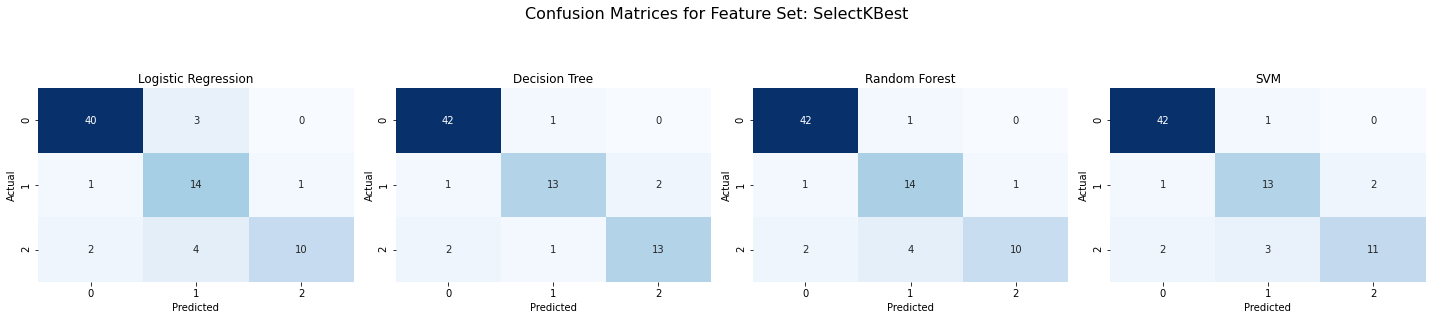

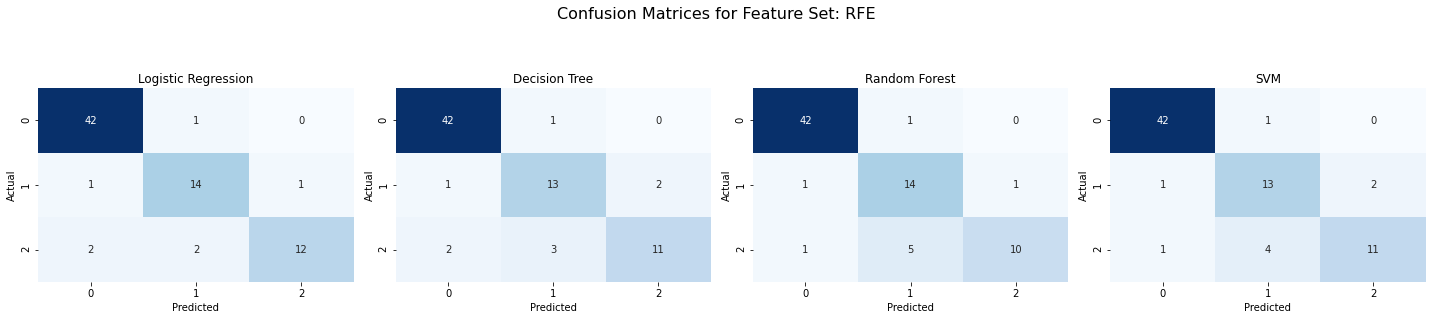

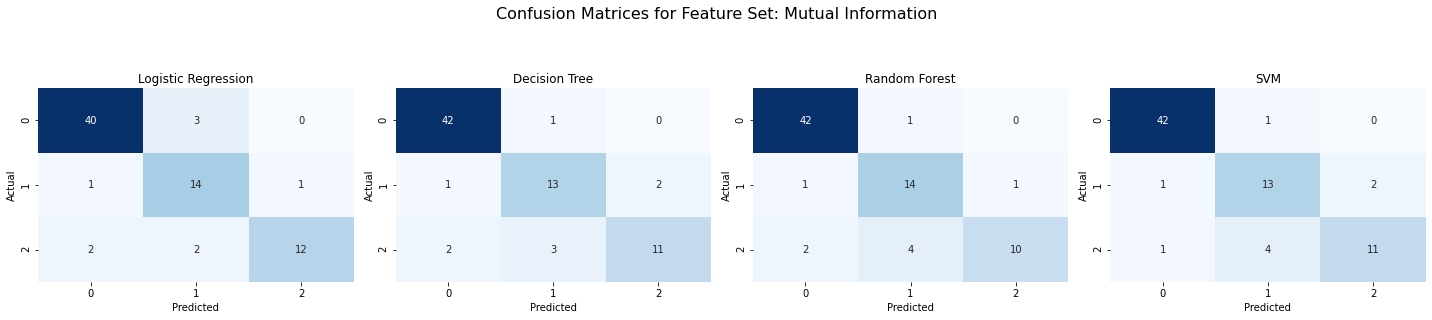

In [32]:
# Confusion Matrix i√ßin gerekli importlar
from sklearn.metrics import confusion_matrix
# 5Ô∏è‚É£ Confusion Matrix √ßizimi
for set_name, X in X_sets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    plt.figure(figsize=(20, 4))
    plt.suptitle(f'Confusion Matrices for Feature Set: {set_name}', fontsize=16, y=1.1)
    
    for idx, (model_name, model) in enumerate(classifiers.items(), 1):
        plt.subplot(1, 4, idx)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])  # sƒ±nƒ±f etiketleri sabitleniyor
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(model_name)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
    
    plt.tight_layout()
    plt.show()